In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', header=None, names=['x1', 'x2', 'label'])
X = np.array(data[['x1', 'x2']])
Y = np.array(data['label'])



In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(y, y_hat):
    epsilon = 1e-9  # To prevent log(0)
    return -y * np.log(y_hat + epsilon) - (1 - y) * np.log(1 - y_hat + epsilon)

def predict_prob(x, weights, bias):
    return sigmoid(np.dot(weights, x) + bias)

def predict(x, weights, bias):
    return 1 if predict_prob(x, weights, bias) >= 0.5 else 0

def plot_points(data):
    admitted = data[data['label'] == 1]
    rejected = data[data['label'] == 0]
    plt.scatter(admitted['x1'], admitted['x2'], color='blue', edgecolor='k', label="Admit")
    plt.scatter(rejected['x1'], rejected['x2'], color='red', edgecolor='k', label="Reject")
    plt.legend()

def plot_decision_boundary(weights, bias, color='g--'):
    x_vals = np.array([0, 1])
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    plt.plot(x_vals, y_vals, color)


In [15]:
def train_gradient_descent(X, Y, learning_rate=0.01, num_iterations=100):
    weights = np.random.rand(2)  
    bias = np.random.rand() 
    losses = []  

    plt.figure(figsize=(8, 6))
    plot_points(data)
    plot_decision_boundary(weights, bias, 'r-')
    plt.title("Initial Decision Boundary")
    plt.show()

    for iteration in range(num_iterations):
        total_loss = 0
        for i in range(len(X)):
            x = X[i]
            y = Y[i]
            y_hat = predict_prob(x, weights, bias)

            error = y - y_hat
            weights[0] += learning_rate * error * x[0]
            weights[1] += learning_rate * error * x[1]
            bias += learning_rate * error

            total_loss += log_loss(y, y_hat)

        losses.append(total_loss / len(X))

        if iteration % 10 == 0:
            plot_points(data)
            plot_decision_boundary(weights, bias, 'g--')
            plt.title(f"Iteration {iteration + 1}")
            plt.show()

    plot_points(data)
    plot_decision_boundary(weights, bias, 'k-')
    plt.title("Final Decision Boundary After All Iterations")
    plt.show()

    plt.plot(range(num_iterations), losses, marker='o')
    plt.title("Log Loss Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.show()


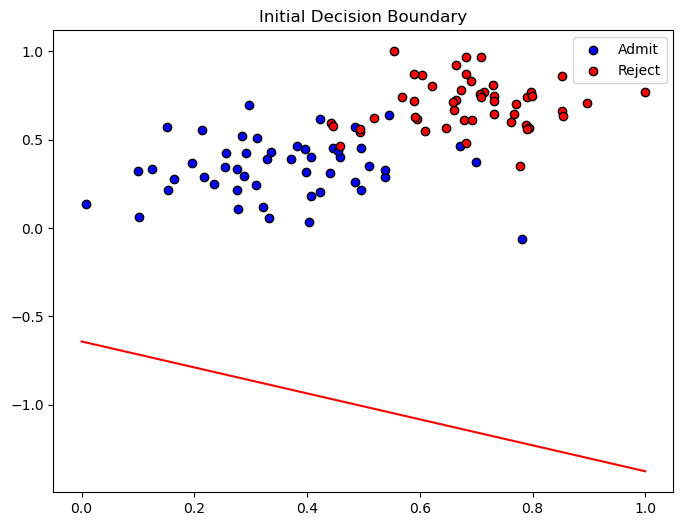

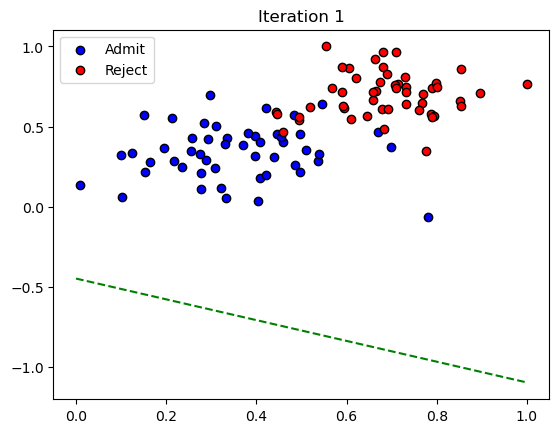

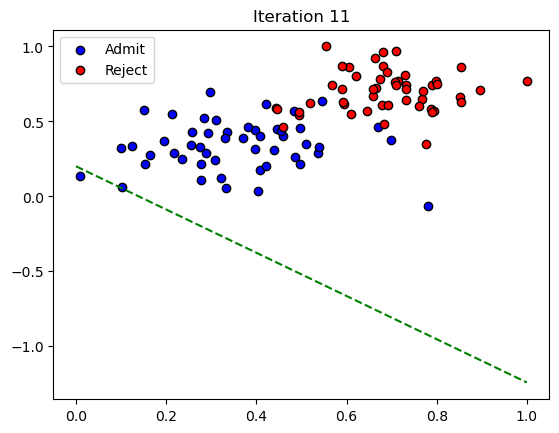

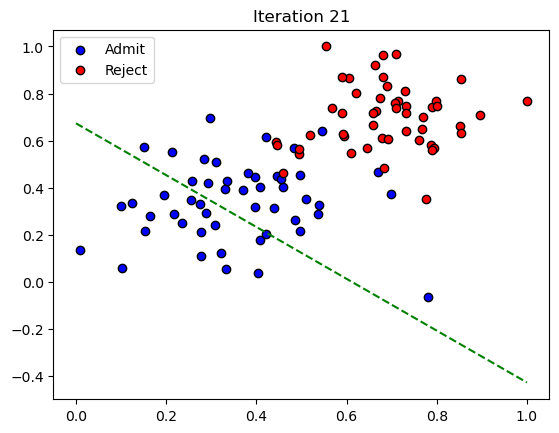

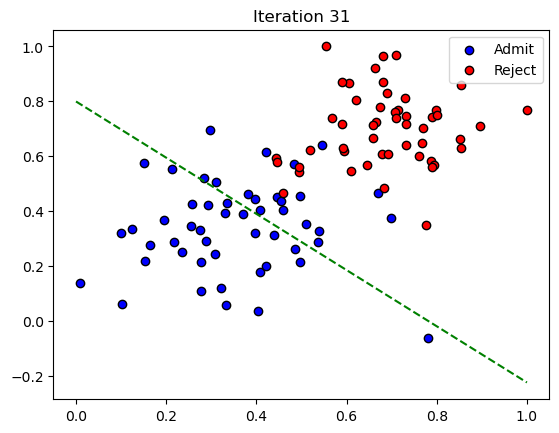

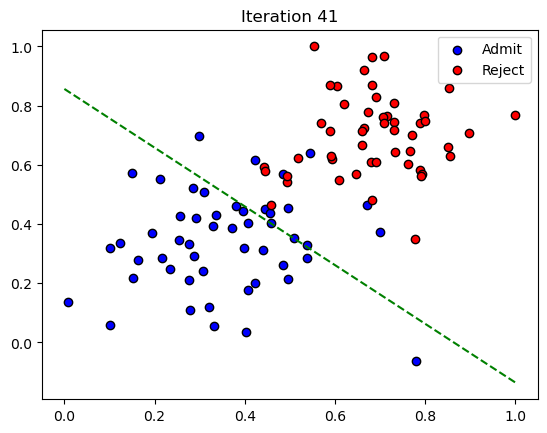

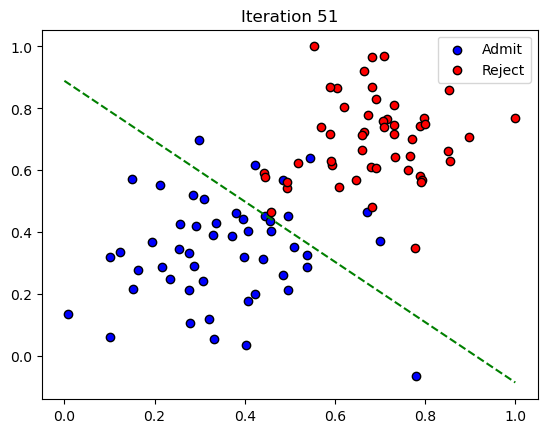

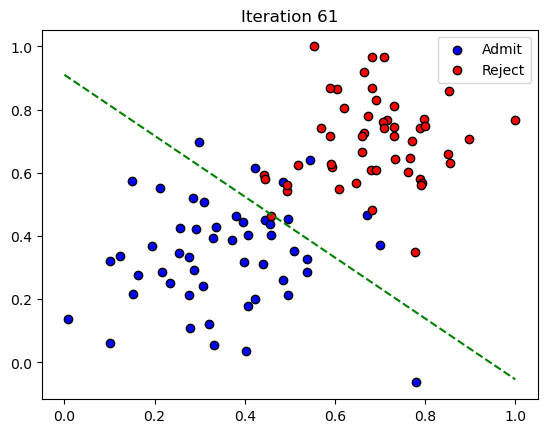

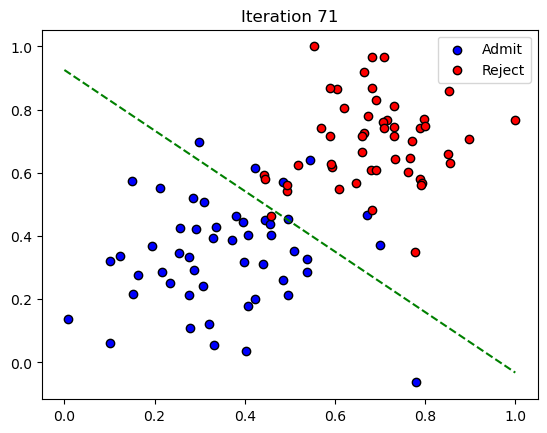

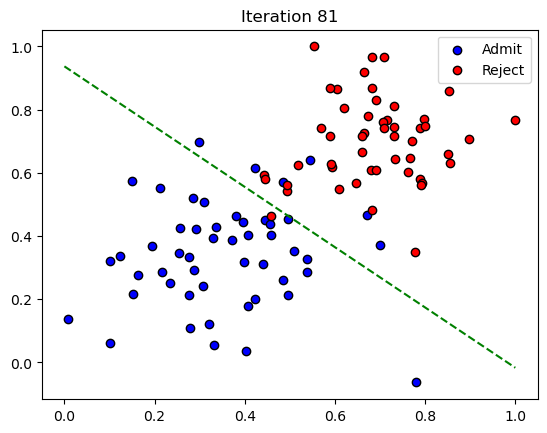

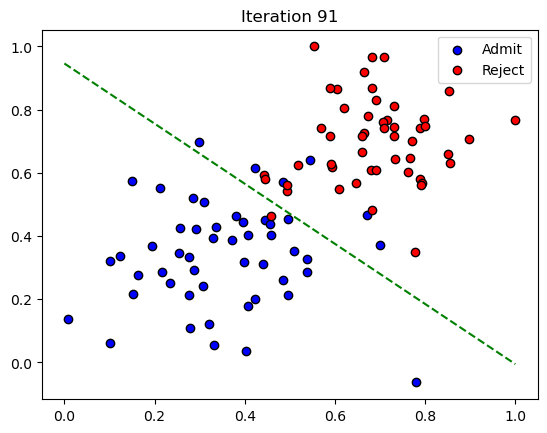

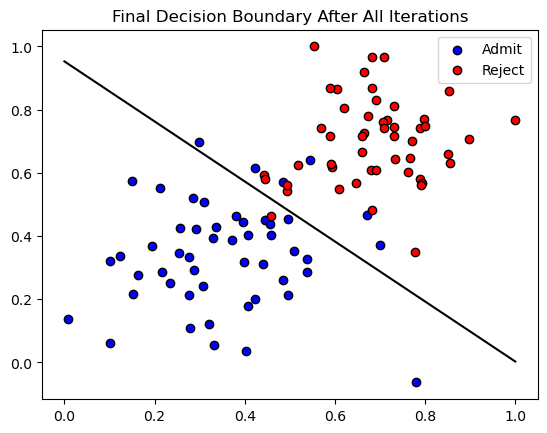

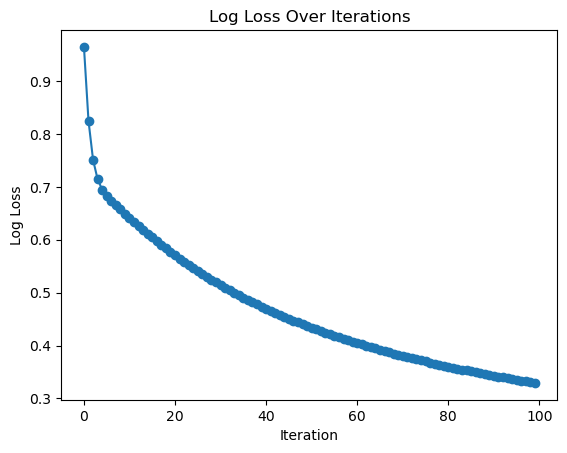

In [17]:
train_gradient_descent(X, Y, learning_rate=0.01, num_iterations=100)
